# Customer Segmentation Analysis

This notebook analyzes customer behavior to identify distinct segments:
1. Bargain Hunters
2. High Spenders
3. Window Shoppers

## Setup and Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Configure plotting
%matplotlib inline
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'axes.grid': True
})

## Data Loading and Preprocessing

In [2]:
# Load data
df = pd.read_csv('customer_behavior_analytcis.csv')

# Define features
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 
            'product_click', 'discount_counts']

# Handle missing values
for col in features:
    df[col] = df[col].fillna(df[col].mean())

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

print("Dataset Info:")
print(df.info())
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   999 non-null    float64
 1   avg_cart_value    999 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     999 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None


,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


## K-means Clustering

In [3]:
# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels
df['Cluster'] = clusters
cluster_map = {
    0: 'Bargain Hunters',
    1: 'High Spenders',
    2: 'Window Shoppers'
}
df['Segment'] = df['Cluster'].map(cluster_map)

c:\Users\Sachindu Nethmin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


## Cluster Visualization

<Figure size 2000x1000 with 0 Axes>

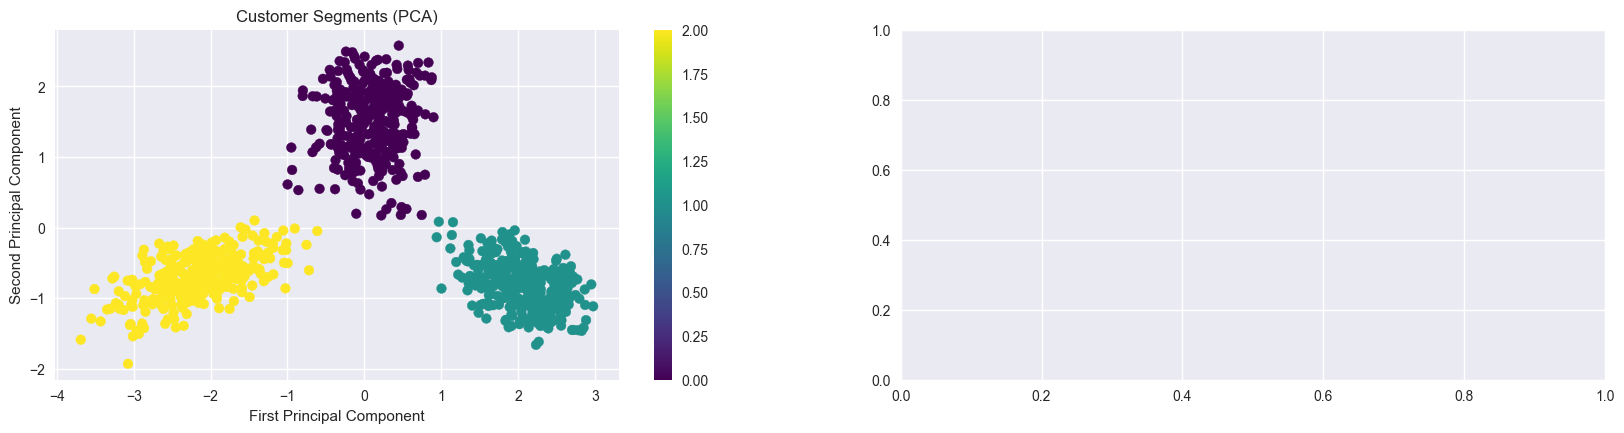

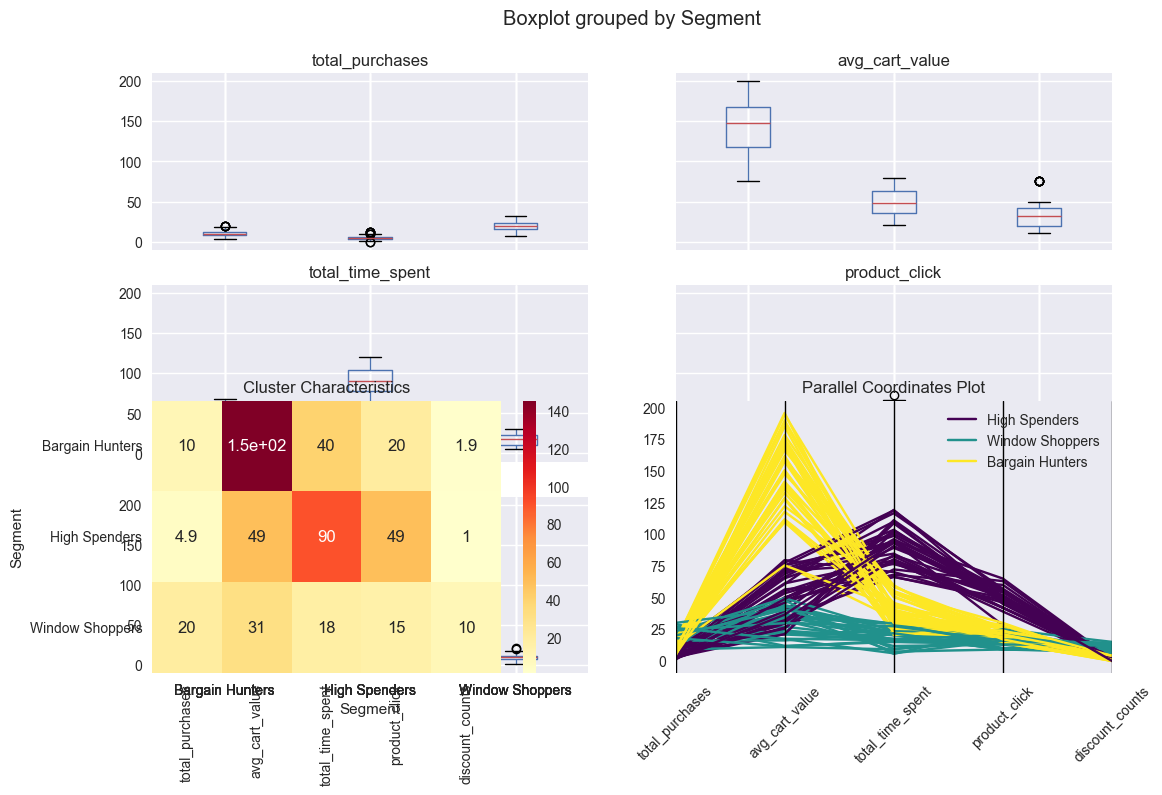

In [7]:
# Create visualization subplots
fig = plt.figure(figsize=(20, 10))

# 1. PCA Scatter plot
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.subplot(2, 2, 1)
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)

# 2. Box plots
plt.subplot(2, 2, 2)
df.boxplot(column=features, by='Segment')
plt.xticks(rotation=45)
plt.title('Feature Distribution by Segment')

# 3. Heatmap
plt.subplot(2, 2, 3)
cluster_means = df.groupby('Segment')[features].mean()
sns.heatmap(cluster_means, annot=True, cmap='YlOrRd')
plt.title('Cluster Characteristics')

# 4. Parallel coordinates
plt.subplot(2, 2, 4)
pd.plotting.parallel_coordinates(
    df.sample(n=100), 'Segment', 
    cols=features, 
    colormap=plt.cm.viridis
)
plt.title('Parallel Coordinates Plot')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Cluster Analysis

In [4]:
print("Cluster Characteristics:")
print("=======================")

for segment in df['Segment'].unique():
    cluster_data = df[df['Segment'] == segment]
    print(f"\n{segment}:")
    print("-" * len(segment))
    
    means = cluster_data[features].mean()
    
    for feature, value in means.items():
        level = "High" if value > df[feature].mean() else "Low"
        print(f"{feature}: {level} ({value:.2f})")
    
    print(f"Size: {len(cluster_data)} customers")
    print(f"Percentage: {(len(cluster_data) / len(df) * 100):.1f}%")

Cluster Characteristics:

Bargain Hunters:
---------------
total_purchases: Low (10.21)
avg_cart_value: High (145.39)
total_time_spent: Low (40.47)
product_click: Low (20.12)
discount_counts: Low (1.94)
Size: 334 customers
Percentage: 33.4%

Window Shoppers:
---------------
total_purchases: High (19.54)
avg_cart_value: Low (31.35)
total_time_spent: Low (17.51)
product_click: Low (15.22)
discount_counts: High (9.97)
Size: 333 customers
Percentage: 33.3%

High Spenders:
-------------
total_purchases: Low (4.94)
avg_cart_value: Low (49.35)
total_time_spent: High (90.21)
product_click: High (49.46)
discount_counts: Low (1.03)
Size: 332 customers
Percentage: 33.2%
